<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Nicole_Koshy_pybootcamp_Day1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

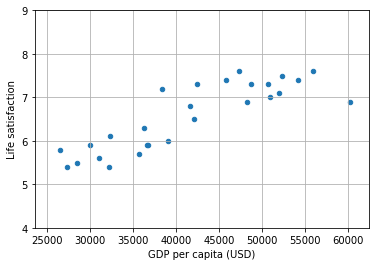

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [22]:
# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]] # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # output: [[6.30165767]]

[[6.30165767]]


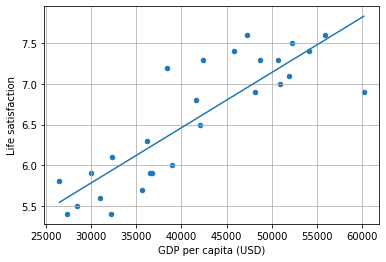

In [23]:
lifesat.plot(kind='scatter', grid=True,
x="GDP per capita (USD)", y="Life satisfaction")
plt.plot(X, model.predict(X))

In [24]:
X1 = lifesat[["GDP per capita (USD)"]].values
y1 = lifesat[["Life satisfaction"]].values

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)

model.fit(X1, y1)

# Make a prediction for Cyprus
X_new1 = [[37_655.2]] # Cyprus' GDP per capita in 2020
print(model.predict(X_new1)) # output: [[6.30165767]]

[[6.33333333]]


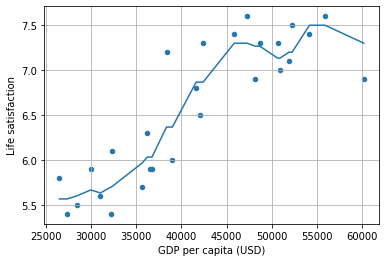

In [25]:
lifesat.plot(kind='scatter', grid=True,
x="GDP per capita (USD)", y="Life satisfaction")
plt.plot(X1, model.predict(X1))

In [26]:
lifesat2 = pd.DataFrame(lifesat)
lifesat2.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [ ]:
### Chapter 2

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
  with tarfile.open(tarball_path) as housing_tarball:
    housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

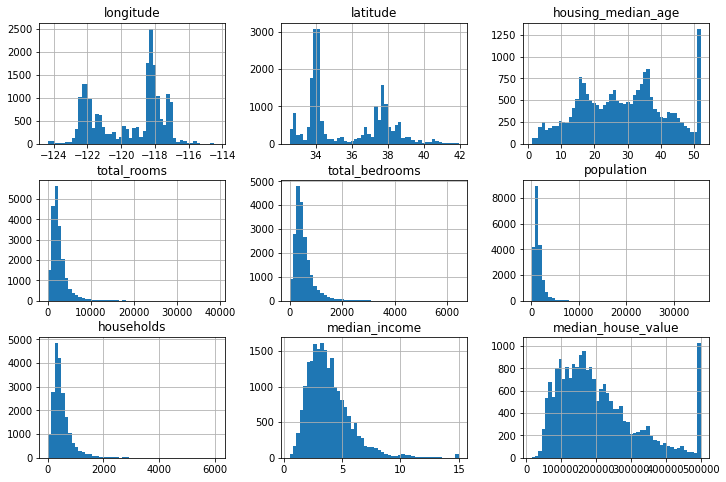

In [5]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [7]:
import numpy as np
def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
>>> train_set, test_set = shuffle_and_split_data(housing, 0.2)
>>> len(train_set)
16512
>>> len(test_set)
4128

In [8]:
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32
def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [9]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [10]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

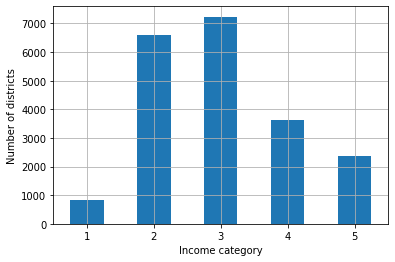

In [13]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])